# Finance Data Project. This project is just meant  for visualization of stock prices in financing.

## DATA SETUP

### Directly read data from Google finance using pandas.
*Note: [You'll need to install pandas-datareader for this to work!](https://github.com/pydata/pandas-datareader) Pandas datareader allows you to [read stock information directly from the internet](http://pandas.pydata.org/pandas-docs/stable/remote_data.html)

In [130]:
 from pandas_datareader  import data
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Data

We need to get data using pandas datareader. We will get stock information for the following banks:
*  Bank of America : BAC
* CitiGroup : C
* Goldman Sachs : GS
* JPMorgan Chase : JPM
* Morgan Stanley : MS
* Wells Fargo : WFC

#### Steps for collecting data
1. Use datetime to set start and end datetime objects.
2. Figure out the ticker symbol for each bank.
2. Figure out how to use datareader to grab info on the stock.

** Use [this documentation page](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html) for help, For example :
    # Bank of America
    BAC = data.DataReader("BAC", 'yahoo', start, end)
###### 'google' can also be used instead of 'yahoo', due to company split of Citigroup its data is inaccurate , C and CG both can used as Ticker Symbol.


In [131]:
from datetime import datetime


In [132]:
start_date = '2006-01-01'
end_date = '2016-01-01'
tickers=['BAC','CG','GS','JPM','MS','WFC']


In [133]:
BAC =data.DataReader('BAC','yahoo', start_date, end_date)

CG =data.DataReader('C','yahoo', start_date, end_date)

GS =data.DataReader('GS','yahoo', start_date, end_date)

JPM =data.DataReader('JPM','yahoo', start_date, end_date)

MS =data.DataReader('MS','yahoo', start_date, end_date)

WFC =data.DataReader('WFC','yahoo', start_date, end_date)



In [134]:
bank_stocks = pd.concat([BAC, CG, GS, JPM, MS, WFC],axis=1,keys=tickers)


In [135]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']
bank_stocks

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05   46.830002  46.320000  46.580002  46.639999  14970700.0   
2006-01-06   46.910000  46.349998  46.799999  46.570000  12599800.0   
2006-01-09   46.970001  46.360001  46.720001  46.599998  15619400.0   
...                ...        ...        ...        ...         ...   
2015-12-24   17.379999  17.219999  17.320000  17.270000  29369400.0   
2015-12-28   17.230000  16.980000  17.219999  17.129999  41777500.0   
2015-12-29   17.350000  17.160000  17.250000  17.280001  45670400.0   
2015-12-30   17.240000  17.040001  17.200001  17.049999  35066400.0   
2015-12-31   17.070000  16.830000  17.010000  16.830000  47153000.0   

Bank Ticker                     CG                                      ...  \
Stock Info   Adj Close        High         Low        Open       Close  ...   
Date                                                                    ...   
2006-01-03   35.054218  493.799988  481.100006  490.000000  492.899994  ...   
2006-01-04   34.681938  491.000000  483.500000  488.600006  483.799988  ...   
2006-01-05   34.726604  487.799988  484.000000  484.399994  486.200012  ...   
2006-01-06   34.674480  489.000000  482.000000  488.799988  486.200012  ...   
2006-01-09   34.696808  487.399994  483.000000  486.000000  483.899994  ...   
...                ...         ...         ...         ...         ...  ...   
2015-12-24   15.859037   52.970001   52.450001   52.480000   52.709999  ...   
2015-12-28   15.730473   52.570000   51.959999   52.570000   52.380001  ...   
2015-12-29   15.868218   53.220001   52.740002   52.759998   52.980000  ...   
2015-12-30   15.657003   52.939999   52.250000   52.840000   52.299999  ...   
2015-12-31   15.454980   52.389999   51.750000   52.070000   51.750000  ...   

Bank Ticker         MS                                         WFC             \
Stock Info        Open      Close     Volume  Adj Close       High        Low   
Date                                                                            
2006-01-03   57.169998  58.310001  5377000.0  37.429329  31.975000  31.195000   
2006-01-04   58.700001  58.349998  7977800.0  37.455013  31.820000  31.365000   
2006-01-05   58.549999  58.509998  5778000.0  37.557716  31.555000  31.309999   
2006-01-06   58.770000  58.570000  6889800.0  37.596241  31.775000  31.385000   
2006-01-09   58.630001  59.189999  4144500.0  37.994202  31.825001  31.555000   
...                ...        ...        ...        ...        ...        ...   
2015-12-24   32.570000  32.480000  2798200.0  29.116337  55.090000  54.709999   
2015-12-28   32.360001  32.169998  5420300.0  28.838438  54.779999  54.169998   
2015-12-29   32.439999  32.549999  6388200.0  29.179089  55.349998  54.990002   
2015-12-30   32.500000  32.230000  5057200.0  28.892221  55.310001  54.790001   
2015-12-31   31.910000  31.809999  8154300.0  28.515720  54.950001  54.220001   

Bank Ticker                                               
Stock Info        Open      Close      Volume  Adj Close  
Date                                                      
2006-01-03   31.600000  31.900000  11016400.0  20.904305  
2006-01-04   31.799999  31.530001  10870000.0  20.661839  
2006-01-05   31.500000  31.495001  10158000.0  20.638908  
2006-01-06   31.580000  31.680000   8403800.0  20.760138  
2006-01-09   31.674999  31.674999   5619600.0  20.756863  
...                ...        ...         ...        ...  
2015-12-24   54.970001  54.820000   4999400.0  46.785397  
2015-12-28   54.549999  54.680000   8288800.0  46.665909  
2015-12-29   55.110001  55.290001   7894900.0  47.186504  
2015-12-30   55.270000  54.889999   8016900.0  46.84513

In [136]:
bank_stocks.head()

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05   46.830002  46.320000  46.580002  46.639999  14970700.0   
2006-01-06   46.910000  46.349998  46.799999  46.570000  12599800.0   
2006-01-09   46.970001  46.360001  46.720001  46.599998  15619400.0   

Bank Ticker                     CG                                      ...  \
Stock Info   Adj Close        High         Low        Open       Close  ...   
Date                                                                    ...   
2006-01-03   35.054218  493.799988  481.100006  490.000000  492.899994  ...   
2006-01-04   34.681938  491.000000  483.500000  488.600006  483.799988  ...   
2006-01-05   34.726604  487.799988  484.000000  484.399994  486.200012  ...   
2006-01-06   34.674480  489.000000  482.000000  488.799988  486.200012  ...   
2006-01-09   34.696808  487.399994  483.000000  486.000000  483.899994  ...   

Bank Ticker         MS                                         WFC             \
Stock Info        Open      Close     Volume  Adj Close       High        Low   
Date                                                                            
2006-01-03   57.169998  58.310001  5377000.0  37.429329  31.975000  31.195000   
2006-01-04   58.700001  58.349998  7977800.0  37.455013  31.820000  31.365000   
2006-01-05   58.549999  58.509998  5778000.0  37.557716  31.555000  31.309999   
2006-01-06   58.770000  58.570000  6889800.0  37.596241  31.775000  31.385000   
2006-01-09   58.630001  59.189999  4144500.0  37.994202  31.825001  31.555000   

Bank Ticker                                               
Stock Info        Open      Close      Volume  Adj Close  
Date                                                      
2006-01-03   31.600000  31.900000  11016400.0  20.904305  
2006-01-04   31.799999  31.530001  10870000.0  20.661839  
2006-01-05   31.500000  31.495001  10158000.0  20.638908  
2006-01-06   31.580000  31.680000   8403800.0  20.760138  
2006-01-09   31.674999  31.674999   5619600.0  20.756863  

[5 rows x 36 columns]

#### The Maximum Close value of each bank in these 10 year which is CitiGroup company .

In [137]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     54.900002
CG     564.099976
GS     247.919998
JPM     70.080002
MS      89.300003
WFC     58.520000
dtype: float64

#### Creating a Returns dataframe to store all the returns of the company

In [138]:
returns = pd.DataFrame()

In [139]:

    
for tick in tickers:
    returns[tick+' Return'] = bank_stocks[tick]['Close'].pct_change()
returns.head()


,BAC Return,CG Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


#### Pair Plot  of the Returns Dataframe

#### AS you observe the plots, Observe Plots of CitiGroup (CG)  , Graphs stnds

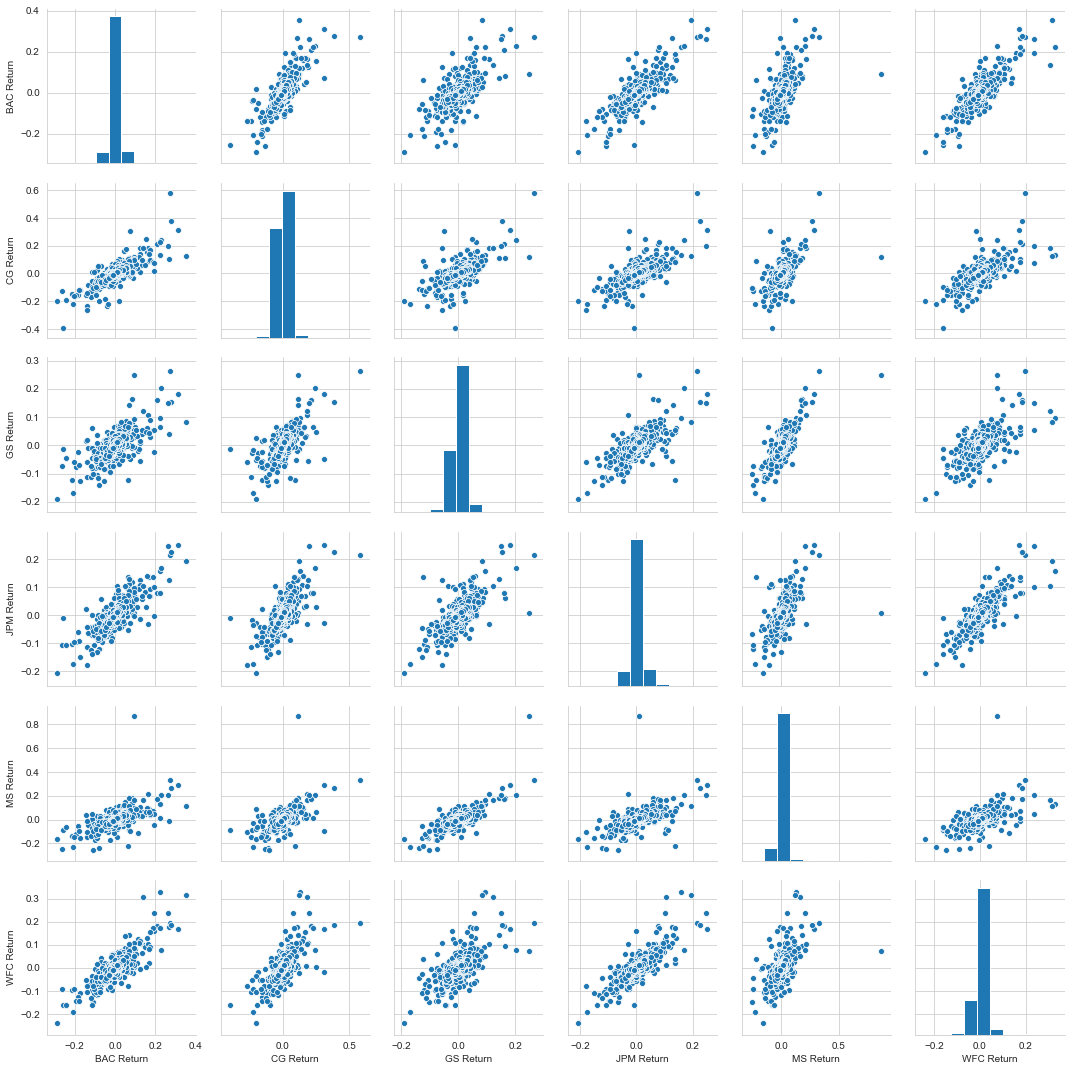

In [140]:

sns.pairplot(returns[1:])


#### Dates each bank stock with  the best and worst single day returns. You should notice that 4 of the banks (BAC, GS, JPM, WFC) share the same day for the worst drop, becauseof the 4 of them on Inauguration day. 

In [141]:
returns.idxmin()

BAC Return   2009-01-20
CG Return    2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

In [142]:
returns.idxmax()

BAC Return   2009-04-09
CG Return    2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

#### Standard Deviation show that higher the value of std() higher is the risk of stocks.

In [143]:
returns.std()

BAC Return    0.036647
CG Return     0.038672
GS Return     0.025390
JPM Return    0.027667
MS Return     0.037819
WFC Return    0.030238
dtype: float64

#### Standard Deviation in Year 2015 
##### MORGON STANLEY has the highest risk as its standard deviation is the highest, lets analyze that.

In [144]:
returns.ix['2015-01-01' : '2015-12-31'].std()

C:\Users\PRACHI PARMAR\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated



BAC Return    0.016163
CG Return     0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

C:\Users\PRACHI PARMAR\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated



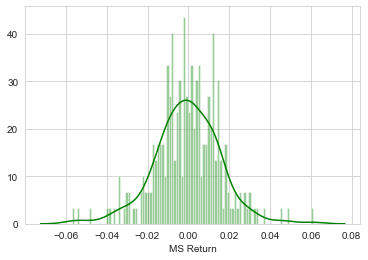

In [145]:
sns.distplot(returns.ix['2015-01-01' : '2015-12-31']['MS Return'],kde=True ,color='green',bins=100)

C:\Users\PRACHI PARMAR\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated



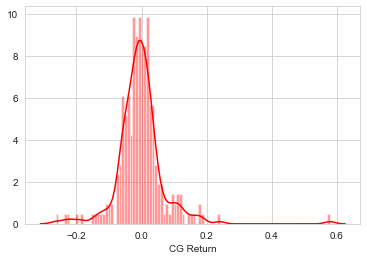

In [146]:
sns.distplot(returns.ix['2008-01-01' : '2008-12-31']['CG Return'],kde=True ,color='red',bins=100)

In [147]:
 sns.set_style('whitegrid')


# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

In [148]:
bank_stocks

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05   46.830002  46.320000  46.580002  46.639999  14970700.0   
2006-01-06   46.910000  46.349998  46.799999  46.570000  12599800.0   
2006-01-09   46.970001  46.360001  46.720001  46.599998  15619400.0   
...                ...        ...        ...        ...         ...   
2015-12-24   17.379999  17.219999  17.320000  17.270000  29369400.0   
2015-12-28   17.230000  16.980000  17.219999  17.129999  41777500.0   
2015-12-29   17.350000  17.160000  17.250000  17.280001  45670400.0   
2015-12-30   17.240000  17.040001  17.200001  17.049999  35066400.0   
2015-12-31   17.070000  16.830000  17.010000  16.830000  47153000.0   

Bank Ticker                     CG                                      ...  \
Stock Info   Adj Close        High         Low        Open       Close  ...   
Date                                                                    ...   
2006-01-03   35.054218  493.799988  481.100006  490.000000  492.899994  ...   
2006-01-04   34.681938  491.000000  483.500000  488.600006  483.799988  ...   
2006-01-05   34.726604  487.799988  484.000000  484.399994  486.200012  ...   
2006-01-06   34.674480  489.000000  482.000000  488.799988  486.200012  ...   
2006-01-09   34.696808  487.399994  483.000000  486.000000  483.899994  ...   
...                ...         ...         ...         ...         ...  ...   
2015-12-24   15.859037   52.970001   52.450001   52.480000   52.709999  ...   
2015-12-28   15.730473   52.570000   51.959999   52.570000   52.380001  ...   
2015-12-29   15.868218   53.220001   52.740002   52.759998   52.980000  ...   
2015-12-30   15.657003   52.939999   52.250000   52.840000   52.299999  ...   
2015-12-31   15.454980   52.389999   51.750000   52.070000   51.750000  ...   

Bank Ticker         MS                                         WFC             \
Stock Info        Open      Close     Volume  Adj Close       High        Low   
Date                                                                            
2006-01-03   57.169998  58.310001  5377000.0  37.429329  31.975000  31.195000   
2006-01-04   58.700001  58.349998  7977800.0  37.455013  31.820000  31.365000   
2006-01-05   58.549999  58.509998  5778000.0  37.557716  31.555000  31.309999   
2006-01-06   58.770000  58.570000  6889800.0  37.596241  31.775000  31.385000   
2006-01-09   58.630001  59.189999  4144500.0  37.994202  31.825001  31.555000   
...                ...        ...        ...        ...        ...        ...   
2015-12-24   32.570000  32.480000  2798200.0  29.116337  55.090000  54.709999   
2015-12-28   32.360001  32.169998  5420300.0  28.838438  54.779999  54.169998   
2015-12-29   32.439999  32.549999  6388200.0  29.179089  55.349998  54.990002   
2015-12-30   32.500000  32.230000  5057200.0  28.892221  55.310001  54.790001   
2015-12-31   31.910000  31.809999  8154300.0  28.515720  54.950001  54.220001   

Bank Ticker                                               
Stock Info        Open      Close      Volume  Adj Close  
Date                                                      
2006-01-03   31.600000  31.900000  11016400.0  20.904305  
2006-01-04   31.799999  31.530001  10870000.0  20.661839  
2006-01-05   31.500000  31.495001  10158000.0  20.638908  
2006-01-06   31.580000  31.680000   8403800.0  20.760138  
2006-01-09   31.674999  31.674999   5619600.0  20.756863  
...                ...        ...         ...        ...  
2015-12-24   54.970001  54.820000   4999400.0  46.785397  
2015-12-28   54.549999  54.680000   8288800.0  46.665909  
2015-12-29   55.110001  55.290001   7894900.0  47.186504  
2015-12-30   55.270000  54.889999   8016900.0  46.84513

#### Below you can see a line plot of the closing prices of all the stock over the time period.
##### As you can see for CitiGroup the value suddenly dropped near 2009 early months due to the financial crisis and it split up .

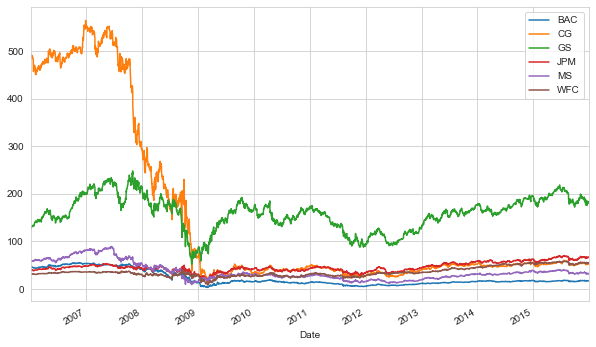

In [149]:
for tick in tickers :
    bank_stocks[tick]['Close'].plot(figsize=(10,6),label=tick)
plt.legend()

In [150]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').iplot()

#### Lets Analyze Moving Averages for year 2008 against the Close value of BAC (Bank Of America)

C:\Users\PRACHI PARMAR\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated

C:\Users\PRACHI PARMAR\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated



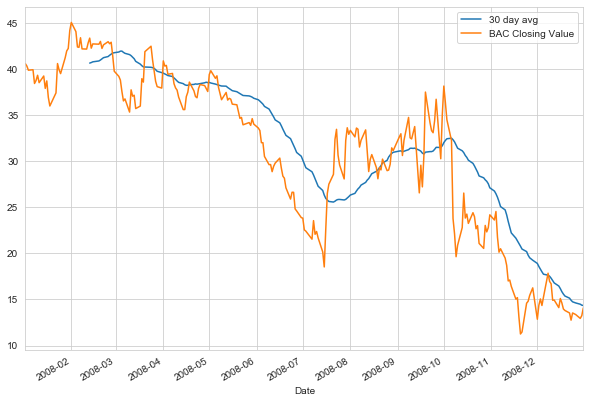

In [151]:
BAC['Close'].ix['2008-01-01' : '2008-12-31'].rolling(window=30).mean().plot(figsize= (10,7), label = "30 day avg")
BAC['Close'].ix['2008-01-01' : '2008-12-31'].plot(figsize= (10,7), label = "BAC Closing Value")
plt.legend()

#### Heatmap of all the Banks with its Close value will give you an idea the correlation value of the company with its closing value.

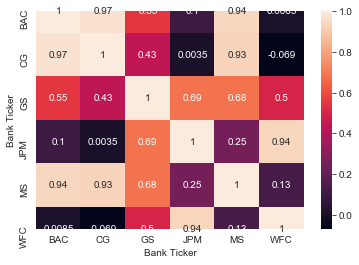

In [152]:
sns.heatmap(bank_stocks.xs(key='Close', level= 'Stock Info',axis=1).corr(),annot=True)

C:\Users\PRACHI PARMAR\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



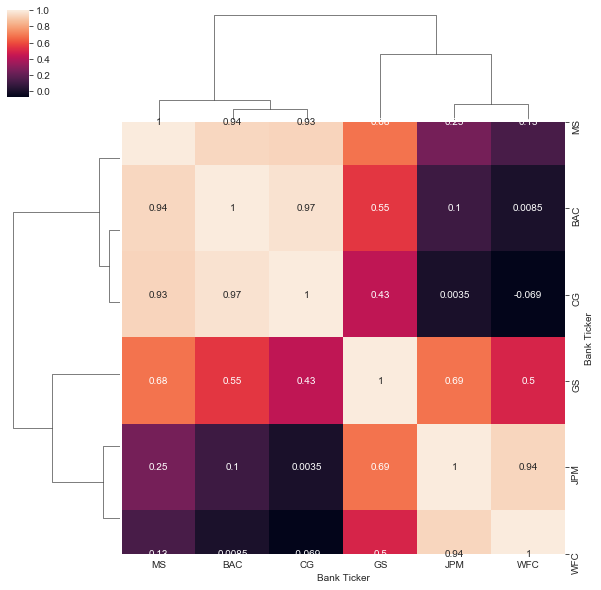

In [153]:
sns.clustermap(bank_stocks.xs(key='Close', level= 'Stock Info',axis=1).corr(),annot=True)
plt.tight_layout()

#### Candle plot of Bank of America for year 2015

In [154]:
BAC[['Open', 'High', 'Low', 'Close']].ix['2015-01-01':'2016-01-01'].iplot(kind='candle')

C:\Users\PRACHI PARMAR\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated



In [155]:
MS['Close'].ix['2015-01-01':'2016-01-01'].ta_plot(study='sma',periods=[13,21,55],title='Simple Moving Averages')

C:\Users\PRACHI PARMAR\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated



#### Bollinger Band Plot of Bank of America 

In [156]:
BAC['Close'].ix['2015-01-01':'2016-01-01'].ta_plot(study='boll')

C:\Users\PRACHI PARMAR\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated

